<a href="https://colab.research.google.com/github/DilraboKodirova/Dilrabo-Kodirova-s-Portfolio/blob/main/Data_Quality_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Quality Assessment**

Our client is Sprocket Central Pty Ltd, a medium size bikes & cycling accessories organisation. 

Primarily, Sprocket Central Pty Ltd needs help with its customer and 
transactions data. The organisation has a large dataset relating to its customers, but their team is unsure how to effectively analyse it to help optimise its marketing strategy. 

Out task is to do the following:
1.  Data Quaility Assessment
2.  Data Insights
3.  Data Insights and Presentation

The client provided us with 3 datasets:
- Customer Demographic 
- Customer Addresses
- Transactions data in the past 3 months


We need to assess the quality of their data; as well as make recommendations on ways to clean the underlying data and mitigate these issues. Also, there is a recommended data quality framework, which we will use as a guidline:

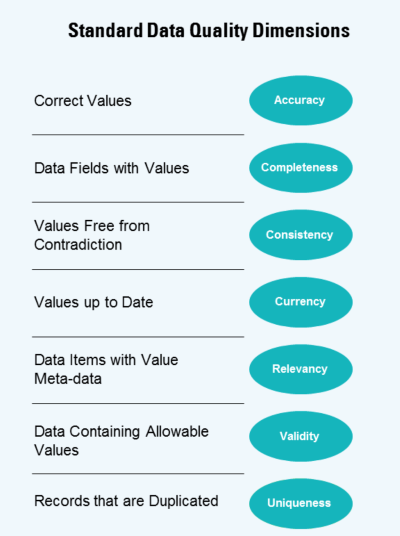

We will review all three datasets separetely taking framework above into consideration. Let's start from the Customer Demographics dataset. 

# Data Quality Assessment for 'Customer Demographics' dataset

In [ ]:
#read dataset
import pandas as pd
demographics=pd.read_excel('Customer Demographics.xlsx')

#explore dataset
print(demographics.info())
demographics.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


From the information above, we can see that:
- some columns (namely 'last_name', 'DOB', 'job_title',  'job_industry_category', 'default' and 'tenture') have missing values
- 'gender' column has different values for the same gender, for e.x. in one row famale is indicated as 'F', whereas in some rows as 'Female'
- 'default' column has vague values, which we may not need at all

However, we still need to look though each column closely to identify other issues. We will skip 'customer_id', 'first_name' as they seem not to have any problems. 'last_name' column has missing values. However, we can keep it as it is, because we still have other identification variables as 'candidate_id' and 'first_name'.

So, let's take close loot to 'gender' column.

In [ ]:
demographics['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
M            1
Femal        1
Name: gender, dtype: int64

Based on this, we can outline 3 gender categories: Female, Male, Unspecified. 
1.   Female, Femal, F - refers to Female
2.   Male, M - refers to Male
3.   U - refers to Unspecified

We will replace wrong values according to these 3 categories. 


In [ ]:
demographics['gender']=demographics['gender'].replace({'Femal':'Female','F':'Female','M':'Male','U':'Unspecified'})

Moving on, there is a 'past_3_years_bike_related_purchases' column, which seems not to have issues. 

Next column is 'DOB', which stands for 'Date of Birth'. We need to check this column for wrong values, that is people's age  should be adequate numbers. According to United Nations report, average life expectancy is 72.6 years. Of course, we can have values higher that 72.6, however, for example, value of 120 would be suspecious. 

In [ ]:
demographics['DOB'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    3913
unique                   3448
top       1978-01-30 00:00:00
freq                        7
first     1843-12-21 00:00:00
last      2002-03-11 00:00:00
Name: DOB, dtype: object

We can see that the earliest DOB we have is 1843-12-21. As of January 2022, this person is 179 years old - this is a wrong value. This is the only wrong value in this column, so deleting one variable would not impact our further implementations substantionaly.  

In [ ]:
demographics=demographics[demographics['DOB']!='1843-12-21 00:00:00']
demographics['DOB'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                    3912
unique                   3447
top       1978-01-30 00:00:00
freq                        7
first     1931-10-23 00:00:00
last      2002-03-11 00:00:00
Name: DOB, dtype: object

The following columns are 'job_title', 'job_industry_category'. There are many missing values in these columns, but we can't solve this issue solely.We can not cut of rows with missing values or fill them with random variables, because they make up 13% and 16% of the dataset and they might impact the dataset and lead us to wrong investigations in the further investigations. Thus, we will keep these columns and go forward

In [ ]:
demographics['wealth_segment'].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     978
Name: wealth_segment, dtype: int64

'wealth_segment' columns has no missing values and has 3 type of values: Mass Customer, High Net Worth, Affluent Customer.  This columns seems not to have any problems. 

Let's check for 'deceased_indicator' column. 

In [ ]:
demographics['deceased_indicator'].value_counts()

N    3997
Y       2
Name: deceased_indicator, dtype: int64

We can see that only 2 customer are deceased. We won't need their information as their data is not vazied anymore. We can exclude them from dataset and delete this column, as we will know that all customer know are alive. 

In [ ]:
demographics=demographics[demographics['deceased_indicator']=='N']
demographics=demographics.drop(['deceased_indicator'], axis=1)

Recall that 'default' column has vague values. We will drop this column too.

In [ ]:
demographics=demographics.drop(['default'], axis=1)

Now we can explore 'owns_car' column

In [ ]:
demographics['owns_car'].value_counts()

Yes    2022
No     1975
Name: owns_car, dtype: int64

No missing or strange values here, so the last column to check for this dataset is 'tenure'.

In [ ]:
demographics['tenure'].describe()

count    3910.000000
mean       10.656266
std         5.659793
min         1.000000
25%         6.000000
50%        11.000000
75%        15.000000
max        22.000000
Name: tenure, dtype: float64

There are no vague variables here, but there are some missing values. We can handle them by filling by mean values. This should not impact our decision considerably, as missing values account for around 2% of the whole column. Our computed mean is 10.656266, which we cannot use, as tenture should be integer. Therefore, we will fill missing values by randomly distrubuting values of 10 or 11.

In [ ]:
import numpy as np
demographics['tenure']=demographics['tenure'].fillna(np.random.randint(10,11))

In [ ]:
demographics.to_excel('New Customer Demographics.xlsx')

**Summary:**

We reviewed Customer Demographics Data to assess its quality. We detected following issues:
1.   'last_name', 'DOB', 'job_title',  'job_industry_category', 'default' and ', 'tenure' column had missing volumes.
2.   'gender' column had wrong values, for e.x.: 'F', 'Femal' instead of 'Female'.
3.   'DOB' column had wrong value, indicating that someone was 179 years old
4.   'default' column had all vague meanings.


We made following steps to mitigate the dataset's issues:
1.   kept 'last_name' column unchanged. Even though we had missing values in this column, we still had other identification variables other than the last name: 'customer_id' and 'first_name', which must be enough for further implementations. 
 
2.   in 'gender' column changed wrong values to one of the 3 types of values: 'Female', 'Male', 'Unspecified'.
 
3.   in 'DOB' column deleted the row with data for a customer who was 179 years old.
 
 
4.   explored 'deceased_indicator' column, found out that only 2 customers were deceased. Excluded these 2 customers, as their data is not valid anymore. Deleted 'deceased_indicator' column, as now we know that all our customers are alive.
 
5.   deleted the 'default' column because it had vague variables and was useless.
 
6.   filled missing values in the 'tenure' column with the mean variable. Because the mean variable was not an integer (mean=10.656266), I randomly distributed values of 10 and 11 in missing values. As missing values were only 2% of the data, this didn't impact the dataset significantly.

We were not able to tackle the following issues:
1.  missing values in 'job_title', 'job_industry_category'.
We could not cut of rows with missing values or fill them with random variables, because they make up 13% and 16% of their columns and they might impact the dataset and lead us to wrong investigations in the further investigations.


# Data Quality Assessment for 'Customer Address' dataset

In [ ]:
#read datset
address=pd.read_excel('Customer Address.xlsx')

#explore dataset
print(address.info())
address.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB
None


,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


This dataset has no missing values, which is already great!

Let's check every column for validity of variables. We start straight from the 'address' column.



In [ ]:
address['address'].value_counts()

3 Mariners Cove Terrace     2
3 Talisman Place            2
64 Macpherson Junction      2
33794 Sommers Crossing      1
30011 Manufacturers Hill    1
                           ..
5447 Buell Hill             1
7547 Garrison Alley         1
03 Granby Parkway           1
06 Corry Pass               1
0 Stephen Park              1
Name: address, Length: 3996, dtype: int64

We see that first three address occured two times in this column. However, they are not necessarily duplicated values. We can have two customers from one household. Thus, these values are correct.

In [ ]:
address['postcode'].value_counts()

2170    31
2155    30
2145    30
2153    29
2770    26
        ..
4552     1
4555     1
2485     1
3580     1
4421     1
Name: postcode, Length: 873, dtype: int64

We can see that most of our customer are from close to each other regions (2170,2155,2145,2153,2770..), whereas few of them are located in far from each other regions(4552,2485,3580...). This might be helpful in our further investigations. 

In [ ]:
address['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

Here is our the firt problem in Address dataset! NSW and New South Wales refers to the same state. The same about VIC and Victoria. We will fix it now.

In [ ]:
address['state']=address['state'].replace({'New South Wales':'NSW', 'Victoria':'VIC'})

In [ ]:
address['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

Now we have defined 3 states: NSW, VIC, QLD. 

Now, let's move on to 'country' column.


In [ ]:
address['country'].value_counts()

Australia    3999
Name: country, dtype: int64

We can see that all addresses are in Australia. As we know that all our customer are in Australi, we can, actually, delete this column to make our dataset handier.

In [ ]:
address=address.drop(['country'], axis=1)

In [ ]:
address['property_valuation'].value_counts()

9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     154
2     143
Name: property_valuation, dtype: int64

Roughly speaking property valuation means ho much your house would cost if it would sold now. Therefore, we would expect our variables to be a monetary units. However, in this dataset it is unclear. We won't delete this column for now as we might need to have some information about customer's assets in our future researches. However, we will ask our team members to clarify this.

In [ ]:
address.to_excel('New Customer Address.xlsx')

**Summary:**

The issues we found:
1.   three addresses occurred two times in 'address' column
2.   'state' column had different variables for the same state, for e.x.: "NSW" and "New South Wales' refer to the same state.
3.   'property_valuation' column has variables in units that we didn't expect. That is we expected this column to have monetary values, whereas it was in units that are not clear. 





The issues we solved:
1.   three addresses, which occurred twice, were left as they were. Because we can have two customers from the same household.
2.   we defined single variables for each state. 
3.   we deleted the 'country' column from the dataset, as we know that all our customers are in Australia. This made our dataset handier.

The issues we could not solve:
1.   'property_valuation' column has variables we don't understand. We will need help from our team. We cannot just delete them because information about customers' assets might use in the future.







# Data Quality Assessment for 'Transactions' dataset

In [ ]:
#read dataset
transactions=pd.read_excel('Transactions.xlsx')

#explore dataset
print(transactions.info())
transactions.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


From the information above, we can see that some columns in this dataset have missing values too, they are:'online_order', 'brand', 'product_line', 'product_class', 'product_size', 'standart_cost', and 'product_first_sold_date'. As we did with precious datasets, let's check all columns for other errors. We can skip 'transaction_id', 'product_id', 'customer_id' columns as they have unique values and seem to have no problems. So, let's start with 'transaction_date' column.

In [ ]:
transactions['transaction_date'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   20000
unique                    364
top       2017-02-14 00:00:00
freq                       82
first     2017-01-01 00:00:00
last      2017-12-30 00:00:00
Name: transaction_date, dtype: object

We can see that all transactions we have are for the whole year of 2017. No issues here, we will move on. 

In [ ]:
transactions['online_order'].value_counts(dropna=False)

1.0    9829
0.0    9811
NaN     360
Name: online_order, dtype: int64

There are some missing values here, but we can't fill them randomly. As missing values make up less than 2% of this column, we will skip it.

In [ ]:
transactions['order_status'].value_counts(dropna=False)

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

We can see that 179 out of 19640 transactions were cancelled. We might not need data for cancelled transactions. So wee can delete these rows and delete the column to make our dataset handier. 

In [ ]:
transactions=transactions[transactions['order_status']=='Approved']

In [ ]:
transactions=transactions.drop(['order_status'], axis=1)

In [ ]:
transactions['brand'].value_counts(dropna=False)

Solex             4211
Giant Bicycles    3283
WeareA2B          3265
OHM Cycles        3016
Trek Bicycles     2965
Norco Bicycles    2885
NaN                196
Name: brand, dtype: int64

Knowing what brands are in-demand can be helpful for next tasks for marketing strategy optimization. We can see that most-demanded is Solex and least-demanded is Narco Bicycles. But there are some missing values too, we will clean them.

In [ ]:
transactions=transactions.dropna(subset=['brand'])

In [ ]:
transactions['product_line'].value_counts(dropna=False)

Standard    14048
Road         3932
Touring      1225
Mountain      420
Name: product_line, dtype: int64

Recall that at first we said that 'product_line' columnhad missing values, but now we can see that because we cleaned previous columns,'product_line' does not have missing values anymore. Let's check other columns, maybe they don't have missing values now.

In [ ]:
print(transactions['product_class'].value_counts(dropna=False))
print('------')
print(transactions['product_size'].value_counts(dropna=False))
print('------')
print(transactions['standard_cost'].value_counts(dropna=False))
print('------')
transactions['product_first_sold_date'].value_counts(dropna=False)  

medium    13701
high       2978
low        2946
Name: product_class, dtype: int64
------
medium    12876
large      3938
small      2811
Name: product_size, dtype: int64
------
388.920000    461
954.820000    394
53.620000     273
161.600000    232
260.140000    231
             ... 
151.960000    124
206.350000    114
667.400024      1
312.735016      1
270.299988      1
Name: standard_cost, Length: 103, dtype: int64
------


33879.0    232
41064.0    228
37823.0    225
39880.0    220
38482.0    218
          ... 
42404.0    167
41848.0    167
41922.0    164
37659.0    162
34586.0    160
Name: product_first_sold_date, Length: 100, dtype: int64

As you can see that these columns don't have missing values anymore. Also, all variables seem to be relevant and accurate, that is no strange values are dected, except 'product_firts_sold_date' column. Yes, there are missing values here, but this column was supposed to have date variables. The values we have in this column are not valid. We will delete this column as well.

In [ ]:
transactions=transactions.drop(['product_first_sold_date'], axis=1)

In [ ]:
transactions.to_excel('New Transaction.xlsx')

**Summary:**

We detected following isssues whil reviewing Transactions dataset:
1.   Missing values in 'online_order', 'brand', 'product_line', 'product_class', 'product_size', 'standart_cost', 'product_fist_sold_date' columns
2.  'order_status' column shows that the order was either approved or cancelled. We might not need information about canceled products.
3.  ''product_fist_sold_date' column had irrelevant integer values instead of DateTime format values.


We fixed these issues:
1.   'online_oder' column has either 'Yes' or 'No' variables ( 1 or 0). Even though there are some missing values, we cannot fill them with random numbers. Thus we will leave it. Missing values make up less than 2% of this dataset.
2.   we deleted all data for products in 'order_status' column that had the status of 'canceled'. 
3.   when we cleaned the dataset using order status, it turned out that we automatically cleaned the following columns and now they don't have any missing values. They don't have strange values either. Exception -'product_fist_sold_date' column.
4. 'product_fist_sold_date' column has vague values. This column is supposed to have DateTime format values, however, it has irrelevant integers. We deleted this column. 


However, we were not able to handle these issues:
1.   'online_oder' column still has a few missing values.









#**Next steps**

We have reviewed all three datasets solely, but now we will combine them in one dataset. Merged dataset will be more useful and handier in the next steps for this project. 

In [ ]:
two_merged=pd.merge(demographics, address, how='inner',on='customer_id')
three_merged=pd.merge(two_merged,transactions, how='inner', on='customer_id')

In [ ]:
three_merged.to_excel('Merged Customer Data.xlsx')